In [1]:
# Class path
#Importing Librariespip
import os
import shutil
import tensorflow as tf
from tensorflow.python import keras

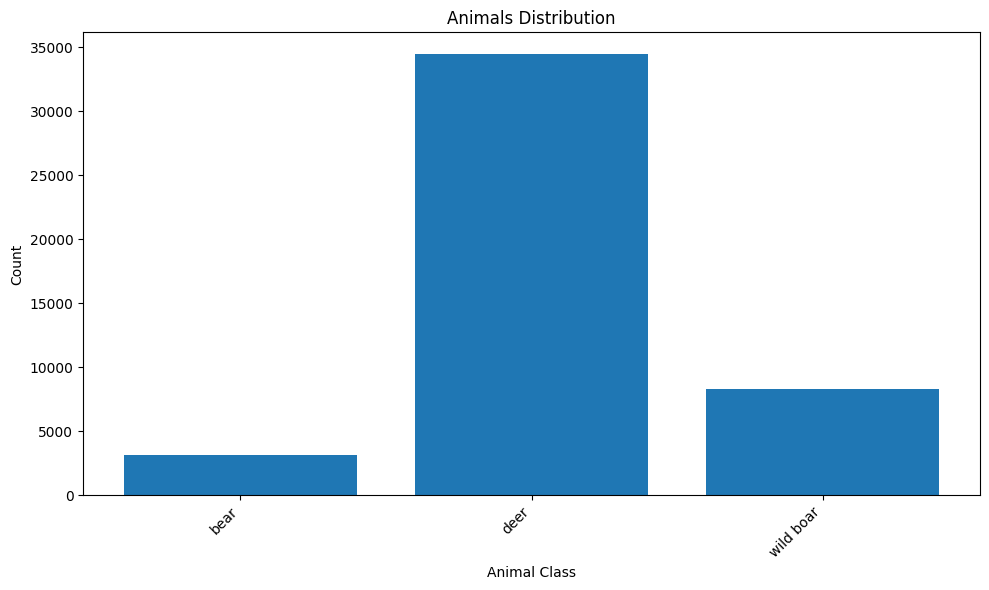

In [2]:
import matplotlib.pyplot as plt
import os

# Replace 'animals_path' with the actual path to your data directory
animals_path = "./DATASET"

# Create lists to store animal class labels and counts
animal_labels = []
animal_counts = []

# Populate the lists with data
for o in os.listdir(animals_path):
    animal_labels.append(o)
    animal_counts.append(len(os.listdir(os.path.join(animals_path, o))))

# Create a bar plot to display the distribution
plt.figure(figsize=(10, 6))
plt.bar(animal_labels, animal_counts)
plt.title("Animals Distribution")
plt.xlabel("Animal Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


In [3]:
import math 
import re 
import sys
import shutil

train_val_test_ratio= (0.7,0.1,0.2)
test_folder = 'test/'
train_folder ='train/'
val_folder = 'val/'
file_names = os.listdir(animals_path)
# Remove existing folders if they exist 
for folder in [test_folder,train_folder,val_folder]:
    if os.path.exists(folder) and os.path.exists(folder):
        shutil.rmtree(folder)

# Remake category folders in both Train and Test Folders

for category in file_names:
    os.makedirs(test_folder+category)
    os.makedirs(train_folder+category)
    os.makedirs(val_folder+category)


KeyboardInterrupt: 

In [4]:
import random  
#Split Data by Train Ratio and copy files to correct directory 
for idx, category in enumerate(file_names):
    file_list = os.listdir(animals_path + '/' + category)
    random.shuffle(file_list)
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio = math.floor(len(file_list) * train_val_test_ratio[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = file_list[train_ratio + val_ratio:]
    
    for i, file in enumerate(train_list):
        shutil.copy(animals_path + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
        
    sys.stdout.write('Moving %d train images to category folder %s' % (len(train_list), category)) 
    sys.stdout.write('\n')
    
    for i, file in enumerate(val_list):
        shutil.copy(animals_path + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
        
    sys.stdout.write('Moving %d validation images to category folder %s' % (len(val_list), category)) 
    sys.stdout.write('\n')
    
    for i, file in enumerate(test_list):
        shutil.copy(animals_path + '/' + category + '/' + file, test_folder + '/' + category + '/' + file)
        
    sys.stdout.write('Moving %d test images to category folder %s' % (len(test_list), category)) 
    sys.stdout.write('\n')
    
print("Done")


KeyboardInterrupt: 

In [5]:
import random
import numpy as np
from keras.preprocessing.image import ImageDataGenerator ,array_to_img,img_to_array,load_img
# importing the library for data augmentation
def data_augment(data_dir):
    list_of_images = os.listdir(data_dir)

    datagen = ImageDataGenerator(
        rotation_range=45,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    for img_name in list_of_images:
        tmp_img_name = os.path.join(data_dir, img_name)

        try:
            img = load_img(tmp_img_name)
            img = img_to_array(img)
            img = img.reshape((1,) + img.shape)
            #The flow function of this object generates batches of augmented data based on the provided parameters.
            batch = datagen.flow(
                img,
                batch_size=1, #processing one image at a time for augmentation.
                seed=21,
                save_to_dir=data_dir,
                save_prefix=img_name.split(".JPG")[0] + "augmented",
                save_format="JPG"
            )
            batch.next() # generates the augmented version of the current image within the loop.

        except Exception as e:
            print(f"Error processing image {img_name}: {str(e)}")


In [7]:
classes_to_augment = [
    "bear", "wild boar"
]
for class_name in classes_to_augment:
    print("Augmentation process happening:", class_name)
    data_dir= os.path.join(train_folder,class_name)
    data_augment(data_dir)
    
    

Augmentation process happening: bear
Augmentation process happening: wild boar
Error processing image puertorico_26_puertorico_26_20150514_225121_ek002167.jpg.jpg: Unable to allocate 91.4 MiB for an array with shape (3, 2448, 3264) and data type float32
Error processing image puertorico_26_puertorico_26_20150514_225122_ek002168.jpg.jpg: Unable to allocate 30.5 MiB for an array with shape (2448, 3264) and data type float32
Error processing image puertorico_26_puertorico_26_20150514_225123_ek002169.jpg.jpg: Unable to allocate 91.4 MiB for an array with shape (2448, 3264, 3) and data type float32
Error processing image puertorico_26_puertorico_26_20150514_225127_ek002170.jpg.jpg: Unable to allocate 91.4 MiB for an array with shape (2448, 3264, 3) and data type float32
Error processing image puertorico_26_puertorico_26_20150514_225129_ek002171.jpg.jpg: Unable to allocate 91.4 MiB for an array with shape (2448, 3264, 3) and data type float32
Error processing image puertorico_26_puertorico_2

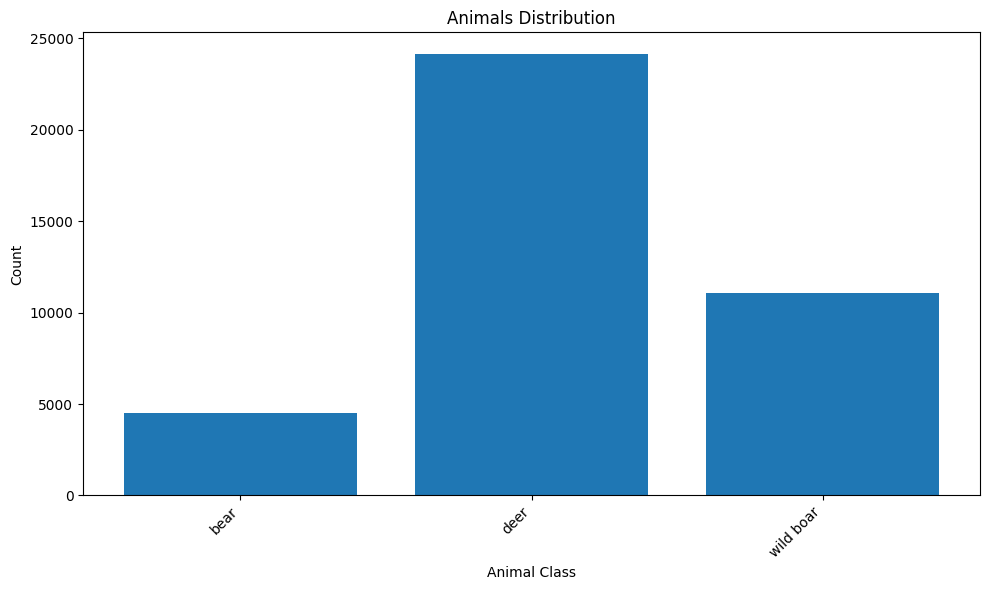

In [11]:
import matplotlib.pyplot as plt
import os

path = "./train"

# Create lists to store animal class labels and counts
animal_labels = []
animal_counts = []

# Populate the lists with data
for o in os.listdir(path):
    animal_labels.append(o)
    animal_counts.append(len(os.listdir(os.path.join(path, o))))

# Create a bar plot to display the distribution
plt.figure(figsize=(10, 6))
plt.bar(animal_labels, animal_counts)
plt.title("Animals Distribution")
plt.xlabel("Animal Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()
